<a href="https://colab.research.google.com/github/anurag1504t/MachineLearning/blob/main/2018BCS_011_ML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Lab Assignment - 1

In [91]:
# Several helpful packages to load in 
import numpy as np;
import matplotlib.pyplot as plt;
import math;
from random import randrange

# Global variables
n=20;             # No of points in Dataset
x_train=[];       # Independent 
y_train=[];       # Dependent

## Training Dataset

In [92]:
# Gaussian Noise Generation
noise=np.random.normal(0,1,n);
print(noise)

[-0.46437583 -0.62564922 -1.87873901 -0.82244934  0.67228799 -1.13042782
 -0.89157465 -0.59509745 -1.39138152  0.96584637 -0.28535243 -0.54958028
 -2.90323913 -2.27978602 -1.18643929 -1.53231746  0.22304303 -0.25194776
 -0.25068913 -0.50230149]


In [93]:
# Generation of Random Dataset. y = sin(x) + noise
for i in range(0,n):
    x=randrange(0,n+1)*2*math.pi/n;
    x_train.append(x);
    y_train.append((math.sin(x)+noise[i]));

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = x_train.reshape(20,1)
y_train = y_train.reshape(20,1)

In [94]:
print('Randomly Generated Dataset with 20 points')
print('X | Y');
for i in range(0,n):
  print(x_train[i] , ' | ' , y_train[i]);

Randomly Generated Dataset with 20 points
X | Y
[0.62831853]  |  [0.12340942]
[0.62831853]  |  [-0.03786396]
[6.28318531]  |  [-1.87873901]
[3.14159265]  |  [-0.82244934]
[0.62831853]  |  [1.26007325]
[2.19911486]  |  [-0.32141082]
[4.71238898]  |  [-1.89157465]
[5.65486678]  |  [-1.1828827]
[0.9424778]  |  [-0.58236453]
[5.02654825]  |  [0.01478985]
[1.25663706]  |  [0.66570408]
[3.14159265]  |  [-0.54958028]
[5.96902604]  |  [-3.21225612]
[4.39822972]  |  [-3.23084253]
[0.9424778]  |  [-0.37742229]
[5.65486678]  |  [-2.12010271]
[6.28318531]  |  [0.22304303]
[2.82743339]  |  [0.05706924]
[2.19911486]  |  [0.55832786]
[5.34070751]  |  [-1.31131848]


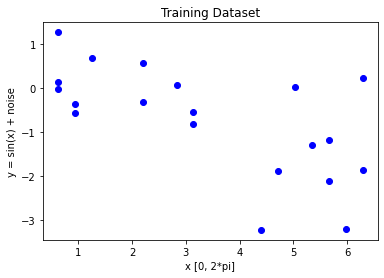

In [95]:
# Plot of Dataset
plt.plot(x_train,y_train,'bo');
plt.xlabel('x [0, 2*pi]');
plt.ylabel('y = sin(x) + noise');
plt.title('Training Dataset');
plt.show()

## Testing Dataset

In [96]:
# Variables
x_test = []
y_test = []

# Generation of Random Dataset. y = sin(x) 
for i in range(0,n):
    x=randrange(0,n+1)*2*math.pi/n;
    x_test.append(x);
    y_test.append(math.sin(x));

x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = x_test.reshape(20,1)
y_test = y_test.reshape(20,1)

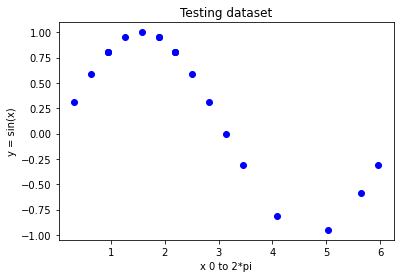

In [97]:
# Plot of Testing Dataset
plt.plot(x_test,y_test,'bo');
plt.xlabel('x 0 to 2*pi');
plt.ylabel('y = sin(x)');
plt.title('Testing dataset');
plt.show()

## Simple Linear Regression



In [98]:
# Fitting Simple Linear Regression to the Training Dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(x_test)

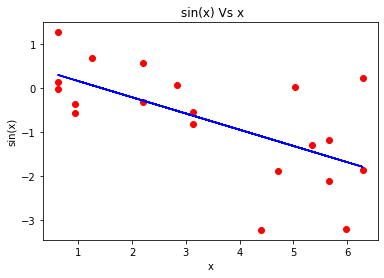

In [99]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title(' sin(x) Vs x')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

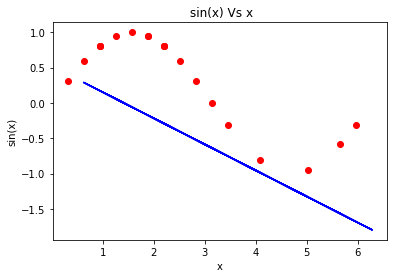

In [100]:
# Visualising the Test set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title(' sin(x) Vs x')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [101]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.7346655022152524

## Multiple Linear Regression

### Training Data

In [102]:
# Variable Declarations
x1_train = []        # First Independent Variable
x2_train = []             # Second Independent Variable
ym_train = []              # Dependent Variable

# Generation of Random Dataset. y = sin(x1) + sin(x2) + noise
for i in range(0,n):
    x1=randrange(0,n+1)*2*math.pi/n
    x2=randrange(0,n+1)*2*math.pi/n
    x1_train.append(x1);
    x2_train.append(x2);
    ym_train.append((math.sin(x1) + math.sin(x2) + noise[i]));

x1_train = np.array(x1_train)
x2_train = np.array(x2_train)
ym_train = np.array(ym_train)

x1_train = x1_train.reshape(20,1)
x2_train = x2_train.reshape(20,1)
ym_train = ym_train.reshape(20,1)

xm_train = np.column_stack((x1_train, x2_train))

In [103]:
xm_train

array([[3.45575192, 2.82743339],
       [0.        , 5.02654825],
       [0.        , 0.62831853],
       [5.34070751, 5.65486678],
       [5.34070751, 4.08407045],
       [0.62831853, 3.45575192],
       [4.08407045, 5.96902604],
       [6.28318531, 1.25663706],
       [3.45575192, 0.        ],
       [1.25663706, 2.51327412],
       [0.62831853, 1.57079633],
       [5.34070751, 6.28318531],
       [5.65486678, 4.71238898],
       [5.02654825, 3.45575192],
       [5.02654825, 0.9424778 ],
       [4.08407045, 2.82743339],
       [0.62831853, 5.02654825],
       [2.82743339, 2.19911486],
       [0.62831853, 0.        ],
       [5.65486678, 3.14159265]])

### Testing Dataset

In [104]:
# Variable Declarations
x1_test = []        # First Independent Variable
x2_test = []             # Second Independent Variable
ym_test = []              # Dependent Variable

# Generation of Random Dataset. y = sin(x1) + sin(x2) 
for i in range(0,n):
    x1=randrange(0,n+1)*2*math.pi/n
    x2=randrange(0,n+1)*2*math.pi/n
    x1_test.append(x1)
    x2_test.append(x2)
    ym_test.append((math.sin(x1) + math.sin(x2)))

xm_test = np.column_stack((x1_train, x2_train))

In [105]:
xm_test

array([[3.45575192, 2.82743339],
       [0.        , 5.02654825],
       [0.        , 0.62831853],
       [5.34070751, 5.65486678],
       [5.34070751, 4.08407045],
       [0.62831853, 3.45575192],
       [4.08407045, 5.96902604],
       [6.28318531, 1.25663706],
       [3.45575192, 0.        ],
       [1.25663706, 2.51327412],
       [0.62831853, 1.57079633],
       [5.34070751, 6.28318531],
       [5.65486678, 4.71238898],
       [5.02654825, 3.45575192],
       [5.02654825, 0.9424778 ],
       [4.08407045, 2.82743339],
       [0.62831853, 5.02654825],
       [2.82743339, 2.19911486],
       [0.62831853, 0.        ],
       [5.65486678, 3.14159265]])

### Fitting Model

In [106]:
# Fitting Multiple Linear Regression to the Training Dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xm_train, ym_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
# Predicting the Test set results
ym_pred = regressor.predict(xm_test)

In [108]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(ym_test, ym_pred)

2.704992864105698

## Polynomial Regression of Degree M

In [109]:
y_train

array([[ 0.12340942],
       [-0.03786396],
       [-1.87873901],
       [-0.82244934],
       [ 1.26007325],
       [-0.32141082],
       [-1.89157465],
       [-1.1828827 ],
       [-0.58236453],
       [ 0.01478985],
       [ 0.66570408],
       [-0.54958028],
       [-3.21225612],
       [-3.23084253],
       [-0.37742229],
       [-2.12010271],
       [ 0.22304303],
       [ 0.05706924],
       [ 0.55832786],
       [-1.31131848]])

In [110]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
# poly.fit_transform(xpoints)

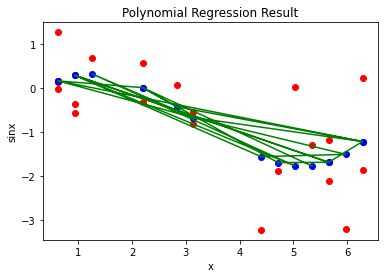

In [113]:
# Visualising the Polynomial Regression results 
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, lin_reg_2.predict(poly_reg.fit_transform(x_train)), color='green')
plt.scatter(x_train, lin_reg_2.predict(poly_reg.fit_transform(x_train)), color='blue')
plt.title('Polynomial Regression Result')
plt.xlabel('x')
plt.ylabel('sinx')
plt.show()

In [114]:
mean_squared_error(y_train,lin_reg_2.predict(poly_reg.fit_transform(x_train)))

0.7665095545715834

## Ridge Regression

In [115]:
# Fitting Ridge Regression to the dataset 
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 

# Predicting the test set Results
y_pred_rr= rr.predict(x_test)


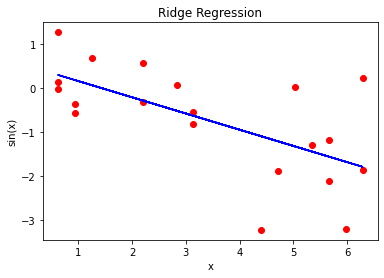

In [116]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, rr.predict(x_train), color = 'blue')
plt.title('Ridge Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

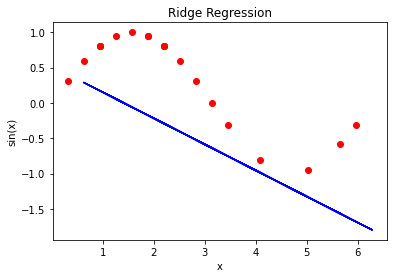

In [117]:
# Visualising the Testing set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, rr.predict(x_train), color = 'blue')
plt.title('Ridge Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [118]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_rr)

0.7347144802190113

## LASSO Regression

In [119]:
# Fitting LASSO Regression to the dataset 
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 

# Predicting the test set Results
y_pred_lasso= model_lasso.predict(x_test)


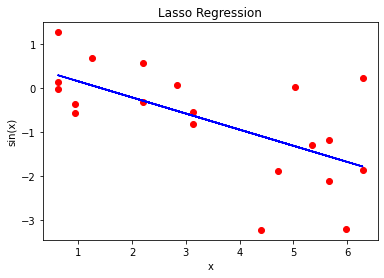

In [120]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, model_lasso.predict(x_train), color = 'blue')
plt.title('Lasso Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

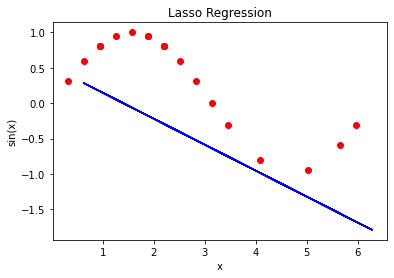

In [121]:
# Visualising the Testing set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, model_lasso.predict(x_train), color = 'blue')
plt.title('Lasso Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [122]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_lasso)

0.7373400098080363

## Elastic-Net Regression

In [123]:
# Fitting ElasticNet Regression to the dataset
from sklearn.linear_model import ElasticNet
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(x_train, y_train) 

# Predicting the test set Results
y_pred_enet= model_enet.predict(x_test)

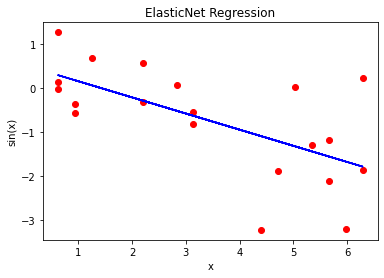

In [124]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, model_enet.predict(x_train), color = 'blue')
plt.title('ElasticNet Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

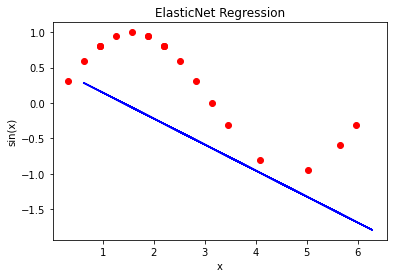

In [125]:
# Visualising the Testing set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, model_enet.predict(x_train), color = 'blue')
plt.title('ElasticNet Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [126]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_enet)

0.7364898030123291

## Bridge Regression

In [127]:
# Fitting Bridge Regression to the dataset
from sklearn.linear_model import BayesianRidge
model_bridge = BayesianRidge() 
model_bridge.fit(x_train, y_train)

# Predicting the test set Results
y_pred_bridge = model_bridge.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


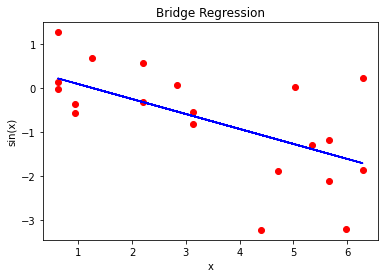

In [128]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, model_bridge.predict(x_train), color = 'blue')
plt.title('Bridge Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

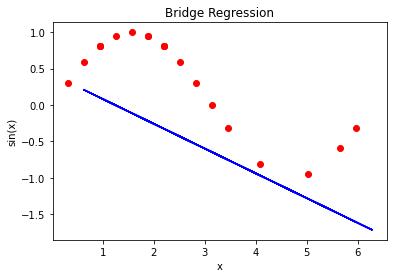

In [129]:
# Visualising the Testing set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, model_bridge.predict(x_train), color = 'blue')
plt.title('Bridge Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [130]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_bridge)

0.7698974480510146